In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from gridworld.agents.buildings import defaults

%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test the base env
No reward is implemented but it still runs the physics

In [143]:
%autoreload 2
from gridworld.agents.buildings import FiveZoneROMEnv

In [146]:
env = FiveZoneROMEnv(
    start_time="08-12-2020 00:00:00",
    end_time="08-13-2020 00:00:00",
    rescale_spaces=False
)

env.obs_labels

['zone_upper_viol_0',
 'zone_upper_viol_1',
 'zone_upper_viol_2',
 'zone_upper_viol_3',
 'zone_upper_viol_4',
 'zone_lower_viol_0',
 'zone_lower_viol_1',
 'zone_lower_viol_2',
 'zone_lower_viol_3',
 'zone_lower_viol_4',
 'comfort_lower',
 'comfort_upper',
 'outdoor_temp',
 'p_consumed',
 'time_of_day']

/Users/dbiagion/gitrepos/PowerGridworld/gridworld/agents/buildings/five_zone_rom_env.py:276: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  obs = np.array([v for k, v in self.state.items() if k in self.obs_labels])


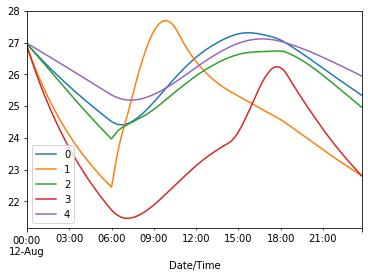

In [147]:
env.reset()
done = False
meta = []
i = 0
zt = []
while not done:
    action = env.action_space.low
    _, _, done, m = env.step(action)
    zt.append(env.zone_temp.copy())
    
_ = pd.DataFrame(zt, index=env.df.index[:len(zt)]).plot()